In [1]:
#import requird library for linear algebra and data read and for ploting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [2]:
#read the file
dataframe1 = pd.read_csv("train (1).txt")
#Give associate column name
dataframe1.columns=["X1",'X2',"target"]

In [3]:
#dataset
dataframe1

,X1,X2,target
0,23.5740,14.405,1
1,28.7860,14.495,1
2,35.5690,23.696,1
3,32.5490,24.228,1
4,33.4600,20.674,1
...,...,...,...
1044,18.7920,37.234,3
1045,19.0620,38.697,3
1046,19.7230,42.395,3
1047,17.9200,35.735,3


In [4]:
#charecteristic for different value of taarget column
f=dataframe1.groupby("target")
f.describe()

X1                                                           \
        count       mean       std      min     25%      50%       75%   
target                                                                   
1       349.0  26.129912  7.170986   5.3208  19.978  26.6480  31.67100   
2       350.0  24.744046  2.292458  19.4890  23.095  24.7775  26.36425   
3       350.0  14.147713  4.879897  -3.1578  10.826  14.3335  17.36250   

                   X2                                                  \
           max  count       mean       std     min       25%      50%   
target                                                                  
1       43.860  349.0  23.910714  6.663467   8.192  18.35100  23.2460   
2       30.571  350.0  25.056291  2.607969  19.860  22.96300  24.9985   
3       26.778  350.0  39.855154  4.789567  27.975  36.34225  39.8750   

                          
             75%     max  
target                    
1       29.46300  41.748  
2       26.93625  30.740  
3       43.15575  53.300

In [5]:
#implimentation of multivariate normal pdf
def multivariate_normal_pdf(pos, mu, Sigma):
    n = mu.shape[0]
    # determinant and inverse calculation
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

In [6]:
#for plotting,estimate mu and sigma from the training data and draw pdf from the arbitrary many point
def multivariate_gaussian_plot(mean_vecs, cov_mats, X1_min, X1_max, X2_min, X2_max, p_min=0, p_max=0.11,base_color='lightblue'):
    # take the point within max and min value of x and y
    #with in x1_min and x1_max take 300 point and for x2 also
    X_1 = np.linspace(X1_min, X1_max, 300)
    X_2 = np.linspace(X2_min, X2_max, 300)
    X_1, X_2 = np.meshgrid(X_1, X_2)
    #form a numpy array
    data = np.empty(X_1.shape + (2,))
    data[:, :, 0] = X_1
    data[:, :, 1] = X_2

    fig = plt.figure(figsize=(8, 8))  # Decrease the figure size
    axes = fig.add_subplot(111, projection="3d")
    #axes = fig.gca(projection="3d")
    #list for taking the z value corresponding to 3 class
    p=[0,0,0]
    i=0
    for mean_vec, cov_mat in zip(mean_vecs, cov_mats):
        #calling the function
        l = multivariate_normal_pdf(data, mean_vec, cov_mat)
        #store the value for after use
        p[i]=l
        #plot suface and contour there parameter are mainly control the structure design
        axes.plot_surface(X=X_1, Y=X_2, Z=l, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)
        axes.contour(X=X_1, Y=X_2, Z=l, zdir="z", cmap=cm.viridis, offset=-0.15)
        i+=1
    #To maintain the same base plot the sum surface
    d=axes.plot_surface(X=X_1, Y=X_2, Z=p[0]+p[1]+p[2], rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)
    axes.set_zlim(-0.15, p_max)
    #set the tick marks on the z-axis to the desired values
    axes.set_zticks(np.linspace(0, p_max, 5))
    #set view angle
    axes.view_init(5, -3)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Gaussian pdfs of 3 class with contour") 

    # Increase the size of the axes
    axes.auto_scale_xyz([X1_min, X1_max], [X2_min, X2_max], [0, p_max])

    plt.show()
     

In [7]:
#find the covarience for different class
cov2=np.array(dataframe1[dataframe1["target"]==1].iloc[:,0:2].cov())
cov3=np.array(dataframe1[dataframe1["target"]==2].iloc[:,0:2].cov())
cov4=np.array(dataframe1[dataframe1["target"]==3].iloc[:,0:2].cov())
print(cov2)
print(cov3)
print(cov4)

[[51.42303652  8.33287152]
 [ 8.33287152 44.40179495]]
[[5.25536251 0.08088763]
 [0.08088763 6.8015004 ]]
[[23.81339307  1.12367789]
 [ 1.12367789 22.93995337]]


# Case-1

In [8]:
#Taking the weighted average
cov=(99*cov2+100*cov3+100*cov4)/299
cov

array([[26.74834841,  3.16190914],
       [ 3.16190914, 24.64857217]])

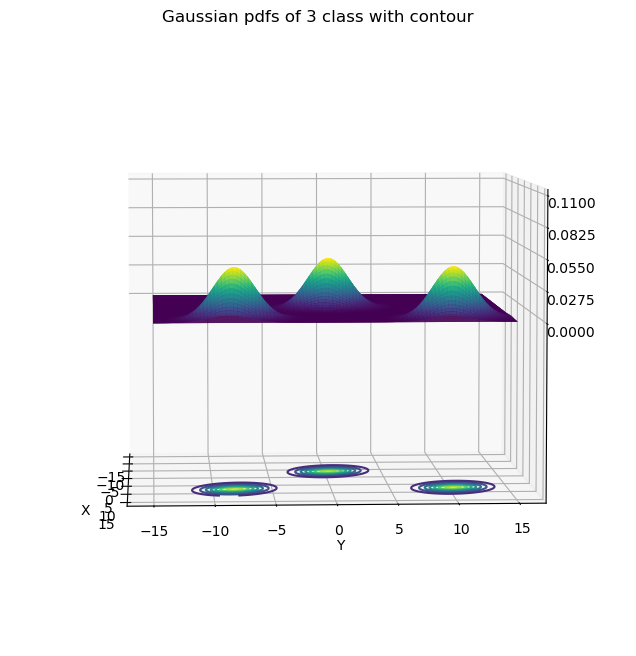

In [9]:
#convert the list to array mean and covarience and then calling the function for ploting
mean_vecs = np.array([[-0.105209,0.150898], [10.833896,10.072410], [11.040748,-8.270119]])
cov_mats = np.array([[[ 4.07012212,-0.55603709],[-0.55603709,3.11802805]], [[4.07012212,-0.55603709],[-0.55603709,3.11802805]],[[ 4.07012212, -0.55603709],[-0.55603709,  3.11802805]]])

multivariate_gaussian_plot(mean_vecs, cov_mats, -15, 15, -15, 15)

# Case-2

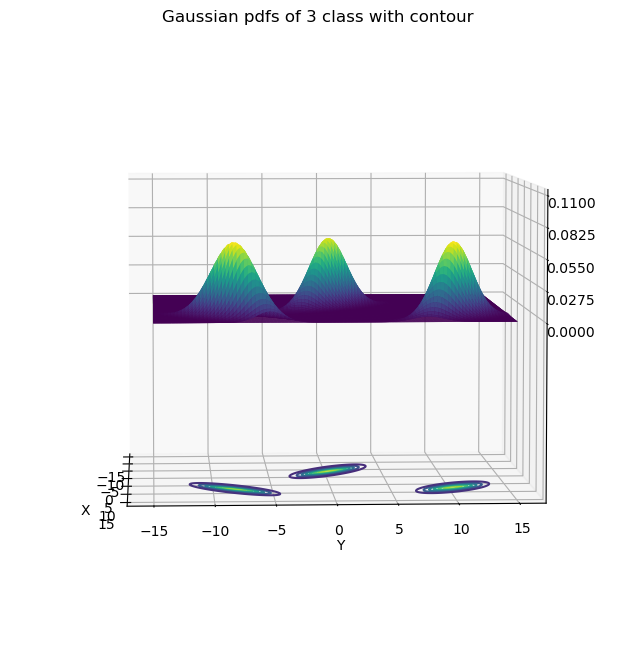

In [10]:
#As the mean is same so we only change the covarience
cov_mats = np.array([[[ 4.81123449,-2.80437363],[-2.80437363,2.94100326]], [[ 3.3055361,-1.91061225],[-1.91061225,2.80792963]],[[4.10100689,3.02439125],[3.02439125,3.603381  ]]])

multivariate_gaussian_plot(mean_vecs, cov_mats, -15, 15, -15, 15)

# Case-3

In [11]:
#same as saperable ,using the MLE we find the maximum value likelihood the corresponding sigma value.
x=dataframe1[dataframe1["target"]==1]["X1"]
y=dataframe1[dataframe1["target"]==1]["X2"]
#Taking each value of x and y
data = np.column_stack((x, y))
mu = np.mean(data, axis=0)
sum_squared_distances = np.sum(np.square(data - mu))
#Using the sigma calcuted formula
result1= sum_squared_distances / (2 * len(data))
print(result1)

47.775130875620405


In [12]:
x=dataframe1[dataframe1["target"]==2]["X1"]
y=dataframe1[dataframe1["target"]==2]["X2"]
data = np.column_stack((x, y))
mu = np.mean(data, axis=0)
sum_squared_distances = np.sum(np.square(data - mu))
result2 = sum_squared_distances / (2 * len(data))
print(result2)

6.0112073679183675


In [13]:
x=dataframe1[dataframe1["target"]==3]["X1"]
y=dataframe1[dataframe1["target"]==3]["X2"]
data = np.column_stack((x, y))
mu = np.mean(data, axis=0)
sum_squared_distances = np.sum(np.square(data - mu))
result3 = sum_squared_distances / (2 * len(data))
print(result3)

23.309882727076083


In [14]:
#takin the weighted average
sigma=(99*result1+100*result2+100*result3)/299
sigma

25.6249062414243

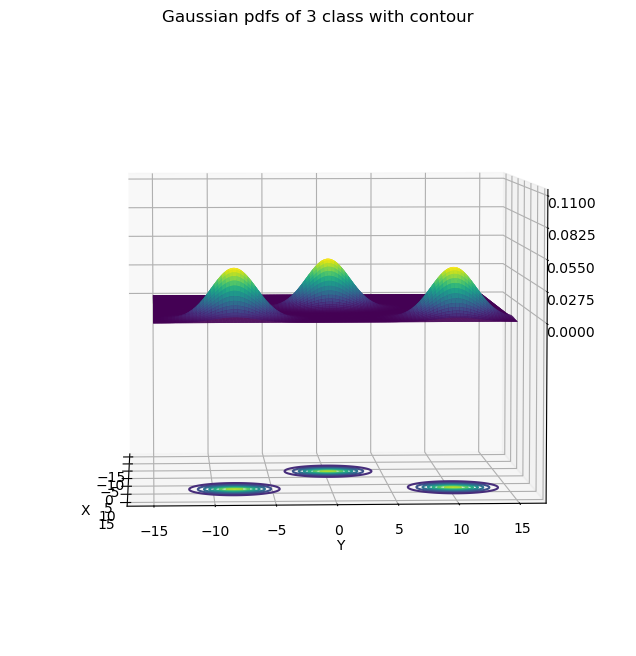

In [15]:
#As the mean is same so we only change the covarience
cov_mats = np.array([[[3.558004,0],[0,3.558004]], [[3.558004,0],[ 0,3.558004]],[[3.558004,0],[ 0,3.558004]]])

multivariate_gaussian_plot(mean_vecs, cov_mats, -15, 15, -15, 15)

# Case-4

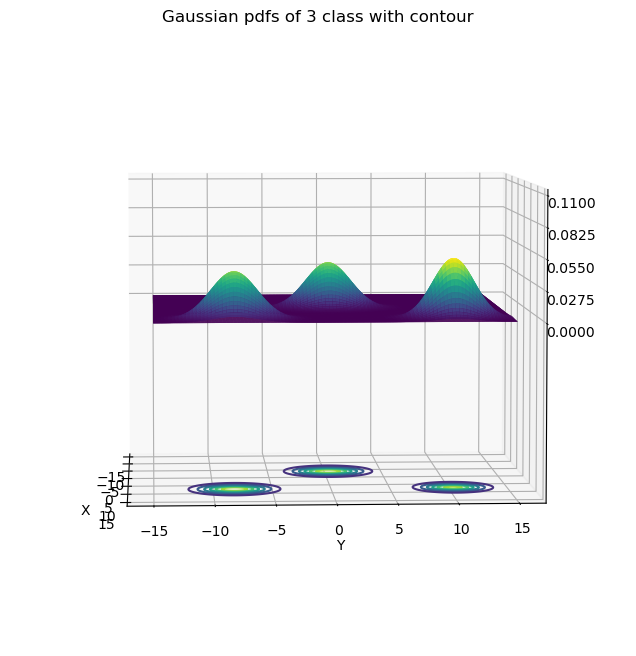

In [16]:
#As the mean is same so we only change the covarience and which is the covarience sigma*I corresponding to each class 
cov_mats = np.array([[[3.836966,0],[0,3.836966]], [[3.026165,0],[ 0,3.026165]],[[3.813672,0],[ 0,3.813672]]])

multivariate_gaussian_plot(mean_vecs, cov_mats, -15, 15, -15, 15)